# "Fun with Loot Boxes" Lab

> Author: Caroline Schmitt, Matt Brems

### Scenario:

You're an analyst for [Zynga](https://en.wikipedia.org/wiki/Zynga), a gaming studio working on an event for an MMO (massively multiplayer online) game. This event is going to include **loot boxes**.

<img src="https://vignette.wikia.nocookie.net/2007scape/images/0/06/Culinaromancer%27s_chest.png/revision/latest?cb=20180403231423" alt="drawing" width="150"/> 

A loot box is basically a treasure chest in a game. This loot box can be opened to reveal a variety of items: some items are very rare and valuable, other items are common and less valuable. (You may consult [the esteemed Wikipedia](https://en.wikipedia.org/wiki/Loot_box) for a more extensive definition.)

In our specific game, suppose that loot boxes can be obtained in one of two ways: 
- After every three hours of playing the game, a user will earn one loot box.
- If the user wishes to purchase a loot box, they may pay $1 (in real money!) for a loot box.

These loot boxes are very good for our business!
- If a player earns a loot box, it means they are spending lots of time on the game. This often leads to advertisement revenue, they may tell their friends to join the game, etc.
- If the player purchases a loot box, it means we've earned $1 from our customer.

Suppose each loot box is opened to reveal either:
- magical elixir (super rare, very valuable), or
- nothing.

Whether each loot box contains the elixir or nothing is **random**. Our boss wants some guidance on what sort of randomness to use on these loot boxes! 
- If the magical elixir is too rare, then users may not be motivated to try to get them, because they believe they'll never find the magical elixir.
- If the magical elixir is too common, then users may not be motivated to try to get them, because the game has so much of the magical elixir that it isn't worthwhile to try to get it.

However, our boss isn't a math-y type person! When explaining things to our boss, we need to explain the impact of our choices on the game as concretely as possible.

### Version 1
In our first version of the game, we'll say that loot boxes contain magical elixir 15% of the time and nothing 85% of the time.

#### 1. Our boss asks, "If a user buys 100 loot boxes, how many elixirs will they get?" How would you respond?

# Ed note:

Probability of getting a magical elixir is .15
P(Elixir): 0.15

We assume a normal distribution with a mean of .15

In [475]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import pandas as pd

# Ed Ans: On average, a user who buys 100 loot boxes will get 15 elixirs. But it's not exact.

<BarContainer object of 100 artists>

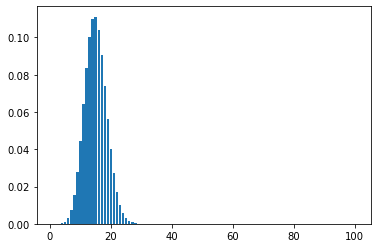

In [239]:
p_elixir = .15
n_buys = 100

loot_box = stats.binom(n_buys, p_elixir)

loot_get = list(range(1, 101))
plt.bar(loot_get,
        loot_box.pmf(loot_get))

#### 2. Our boss asks, "How many loot boxes does someone have to purchase in order to definitely get elixir?" How would you respond?

# Ed Ans: There is no 100% sure chance they will get it. 

#### 3. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" This is a bit more complicated, so let's break it down before answering.

#### 3a. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. Why is $X$ a discrete random variable?

# Ed Ans: X is a discrete random variable because it is either a "1" or "0" (countable) and random because it has probability 0.15

#### 3b. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. What distribution is best suited for $X$? Why?
- Hint: It may help to consider getting the magical elixir a "success" and getting nothing a "failure." 

# Ed Ans: Best distribution is Binomial. Binomial distributions can have multiple trials. Binomial are multiple bernoulli distributions. And this Bernoulli has:
# Parameter used is the 100 observations
# Probability of occurrence is 15%

#### 3c. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the probability mass function to answer the boss' question.

In [317]:
def plot_distn(rv, lb, ub, kind="pdf"):
    xs = np.linspace(lb, ub, 1000)
    
    if kind == "pdf":
        ys = rv.pdf(xs)
    elif kind == "cdf":
        ys = rv.cdf(xs)
        
    plt.figure(figsize=(14, 5))
    plt.plot(xs, ys, linewidth=3, color="navy")

In [339]:
# Show your work; leave your answer in a comment.
prob_elixir = 0.15   # Probability of getting an elixir by opening a box
loot_boxes = 100     # Number of loot boxes opened

possible_outcomes = list(range(0, 101)) # Possible outcomes is from 0 to 100

total_pmf_20 = 0
for loop in range(0, 21):
    total_pmf_20 += stats.binom(loot_boxes, prob_elixir).pmf(loop)

1 - total_pmf_20

# ANSWER: 0.0663

0.06631976581888699

0.040224490661414626

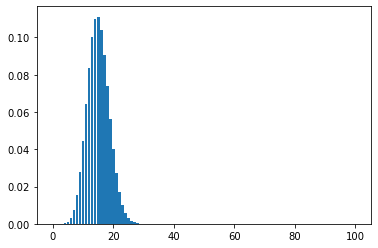

In [344]:
# This gets us the pmf bar chart of 
loot_box_dist = stats.binom(loot_boxes, prob_elixir)
plt.bar(possible_outcomes,
        loot_box_dist.pmf(possible_outcomes))

# This one gets us the probability ONLY when you get 20 elixir.
stats.binom(loot_boxes, prob_elixir).pmf(20)

#### 3d. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the cumulative distribution function to answer the boss' question.

In [345]:
# Show your work; leave your answer in a comment.

# This is SUM of 0 - 20

1 - stats.binom(loot_boxes, prob_elixir).cdf(20) 

# ANSWER: 0.0553

0.06631976581888166

#### 3e. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Answer your boss' question. *Remember that your boss is not a math-y person!*

In [353]:
loot_box_outcome = np.array([0] * 85 + [1] * 15)
loot_box_outcome
def twenty_prob(n):
    count = 0
    for _ in range(n):
        loot_box_result = np.random.choice(loot_box_outcome, size = 100)
        if sum(loot_box_result) > 20:
            count += 1
    return count / n

In [355]:
print(f"A user earning 100 loot boxes has a {round((twenty_prob(100_000) * 100), 2)} % \
chance of getting more than 20 elixirs")

A user earning 100 loot boxes has a 6.64 % chance of getting more than 20 elixirs


#### 4. Your boss wants to know how many people purchased how many loot boxes last month. 
> For example, last month, 70% of users did not purchase any loot boxes. 10% of people purchased one loot box. 5% of people purchased two loot boxes... and so on.

#### 4a. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $Y$ counts up how many loot boxes each person purchased through the game last month. What distribution is best suited for $Y$? Why?

# Answer: Poisson.
1. Poisson distributions observe occurrences in a fixed period of time. 
2. Two events do not occur at the same time
3. The events are independent from one another
4. Rate of purchase is constant (70% no purchase, 10% purchase one loot, 5% two loot...)

#### 4b. Suppose that, on average, your customers purchased 2.7 loot boxes last month. In order for your revenue to be at least $500,000, at least how many users would you need on your platform? (Round your answer up to the nearest thousand.) 

In [421]:
# Show your work; leave your answer in a comment.

total_users = round(500000/2.7, -3)
total_users
# Answer: 185,000

185000.0

#### 4c. Assume that your platform has the numer of users you mentioned in your last answer. Suppose that your platform calls anyone who purchases 5 or more loot boxes in a month a "high value user." How much money do you expect to have earned from "high value users?" How about "low value users?"

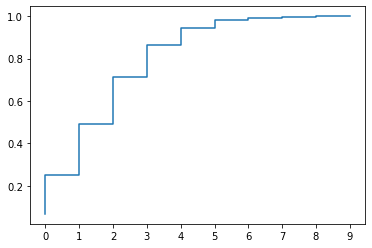

In [629]:
# Show your work; leave your answer in a comment.

# So high value use is when purchase is 5 or more
# low value user is when purchase is 4 or less

lmbda = 2.7 # This is the mean given in 4b
distribution = stats.poisson(lmbda)

xvalues = list(range(10))  # This is the values of x, the horizontal line

# This gives us a step graph of the cumulative distribution
plt.step(xvalues,
         distribution.cdf(xvalues))
plt.xticks(xvalues);

0.6742937169785529

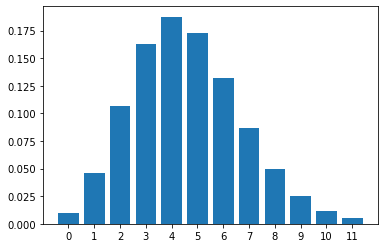

In [636]:
# Question from: https://www.youtube.com/watch?v=jmqZG6roVqU

x_lmbda = 2.3 * 2
x_distn = stats.poisson(x_lmbda)

x_values = list(range(12))
plt.bar(x_values, x_distn.pmf(x_values))
plt.xticks(x_values);

1 - x_distn.cdf(3)

In [582]:
distribution.mean() # Equals 2.7, since duh

distribution.median() # Equals 3 since 2.7 is closest to 3

# The sum proportion of users who are in "low value" category
distribution.cdf(5) # 0.0567316663016012 = 5.67%

low_value_revenue = 0
for purchase_count in range(1, 5):
    low_value_revenue += (distribution.pmf(purchase_count) * total_users * purchase_count)

low_value_revenue = round(low_value_revenue)
low_value_revenue

# Remember that total revenue is $500k, therefore:

# high_value_revenue = 500_000 - low_value_revenue
# high_value_revenue

356689

In [463]:
high_value_revenue = 0
for purchase_count in range(5, 100):
    high_value_revenue += (distribution.pmf(purchase_count) * total_users * purchase_count)

high_value_revenue = round(high_value_revenue)
high_value_revenue

142811

In [590]:
# # ANSWER:
# print(f"We can expect to earn ${high_value_revenue} from 'high value users' \
# while earning ${low_value_revenue} from 'low value users'")

We can expect to earn $142811 from 'high value users' while earning $356689 from 'low value users'


In [591]:
high_revenue_proportion = high_value_revenue / (high_value_revenue + low_value_revenue)
high_revenue_proportion

0.28590790790790793

In [594]:
high_revenue_players_proportion = 1 - distribution.cdf(5)
high_revenue_players_proportion

0.0567316663016012

In [608]:
buy_at_least_one = round(((1 - distribution.cdf(0)) * total_users), -3)
buy_at_least_one # 173_000
buy_at_least_one_proportion = buy_at_least_one / total_users
buy_at_least_one_proportion

0.9351351351351351

In [615]:
buy_at_least_two = round(((1 - distribution.cdf(1)) * total_users), -3)
buy_at_least_two # 139_000
buy_one = buy_at_least_one - buy_at_least_two
buy_one
buy_one_proportion = (buy_at_least_one - buy_at_least_two) / total_users
buy_one, buy_one_proportion

(34000.0, 0.1837837837837838)

#### 4d. Suppose that you want to summarize how many people purchased how many loot boxes last month for your boss. Since your boss isn't math-y, what are 2-4 summary numbers you might use to summarize this for your boss? (Your answers will vary here - use your judgment!)

173,000, or equivalent to 93.5% of people purchase at least one loot box, suggesting a high rate of purchase participation. 

34,000, or equivalent to 18.4% of all users, purchase exactly one loot box.

In discriminating between low and high value users based on whether or not they purchased 5 loot boxes in a month, we see that a small amount of users (the high value users, 5.7% of total users) account for 28.6% of total purchases. 



#### 5. Your boss asks "How many loot boxes does it take before someone gets their first elixir?" Using `np.random.choice`, simulate how many loot boxes it takes somone to get their first elixir. 
- Start an empty list.
- Use control flow to have someone open loot boxes repeatedly.
- Once they open a loot box containing an elixir, record the number of loot boxes it took in the empty list.
- Repeat this process 100,000 times. 

This simulates how long it takes for someone to open a loot box containing elixir. Share the 5th, 25th, 50th, 75th, and 95th percentiles.

> You may find [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html)  and [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html) helpful.

In [709]:
loot_box_outcome = np.array([1] * 15 + [0] * 85)
loot_box_outcome

np.random.seed(42)
def first_elixir(n):
    attempts = np.array([])
    for _ in range(n):
        count = 1
        while np.random.choice(loot_box_outcome) == 0:
            count += 1
        attempts = np.append(attempts, count)
    return attempts

first_elixir(10_000)

array([ 3., 11.,  3., ...,  5.,  6.,  4.])

In [713]:
attempts.describe()
np.quantile(attempts, [0.05, 0.25, 0.5, 0.75, 0.95])

array([ 1.,  2.,  5.,  9., 19.])

In [640]:
elixir_distribution = stats.binom(100, 0.15)

elixir_obtained_outcome = list(range(0, 101))

plt.bar(elixir_obtained_outcome,
       elixir_distribution.pmf(elixir_obtained_outcome))

In [579]:
elixir_distribution.cdf(19)

0.8934557435197008

# Ans: The percentiles to attempts are as such:
5%  = 1

25% = 2

50% = 5

75% = 9

95% = 19

### Version 2

After a substantial update to the game, suppose every loot box can be opened to reveal *one of four different* items:
- magical elixir (occurs 1% of the time, most valuable)
- golden pendant (occurs 9% of the time, valuable)
- steel armor (occurs 30% of the time, semi-valuable)
- bronze coin (occurs 60% of the time, least valuable)

#### 6. Suppose you want repeat problem 5 above, but do that for the version 2 loot boxes so you can track how many loot boxes are needed to get each item? (e.g. You'd like to be able to say that on average it takes 10 trials to get a golden pendant, 3 trials to get steel armor, and so on.) What Python datatype is the best way to store this data? Why?

A dictionary.

Dictionaries allow storage of key-value pairs where the key is the type of item obtained while the value is the chance of getting the item.

# Try Q6.
magical elixir (occurs 1% of the time, most valuable)
golden pendant (occurs 9% of the time, valuable)
steel armor (occurs 30% of the time, semi-valuable)
bronze coin (occurs 60% of the time, least valuable)

In [899]:
# Ok this one's a bit cheating since I'm using two lists instead of just one dictionary.
# Problem is that p=item_probability only takes 1-D but dictionaries are not 1-D

item_probability = [0.01, 0.09, 0.3, 0.6]
item_names = ["elixir", "pendant", "armor", "coin"]

def open_loot_box(n):
    item_obtained = []
    for _ in range(n):
        item_obtained = np.random.choice(item_names, n, replace=True, p=item_probability)
    return item_obtained

result = open_loot_box(10)
result.sort()
result

array(['armor', 'armor', 'coin', 'coin', 'coin', 'coin', 'coin', 'coin',
       'pendant', 'pendant'], dtype='<U7')

# HOLY CRAP THIS WORKSSSSSSS

In [910]:
# So the key is to split the keys (pun intended) and probabilities into two lists
# within the function.
# https://stackoverflow.com/questions/40927221/how-to-choose-keys-from-a-python-dictionary-based-on-weighted-probability/40927437

loot_box_outcome_v2 = {
    "elixir": 0.01,
    "pendant": 0.09,
    "armor": 0.30,
    "coin": 0.60,
}

def open_loot_box(n):
    item_keys = []
    item_probs = []
    for keys, probs in loot_box_outcome_v2.items():
        item_keys.append(keys)
        item_probs.append(probs)
        
    for _ in range(n):
        item_obtained = np.random.choice(item_keys, n, replace=True, \
                                         p=item_probs)
    return item_obtained

open_loot_box(10)

array(['armor', 'armor', 'coin', 'coin', 'coin', 'pendant', 'armor',
       'pendant', 'coin', 'coin'], dtype='<U7')

#### 7. Suppose you and your boss want to measure whether "Version 2" is better than "Version 1." What metrics do you think are important to measure? (Your answers will vary here - use your judgment!)

1. Proportion of users purchasing at least one loot box. This shows whether there is a difference between participation in Version 2 as compared to Version 1.
2. Proportion of users purchasing two loot boxes. This shows whether there is an increased 'motivation' to purchase another loot box with the different rewards in Version 2 vs Version 1.
3. Total number of loot boxes purchased and resulting revenue.
4. Comparing recurrent purchases on Version 2 vs Version 1 to compare whether or not there is a difference in purchase habits.